# Assignment _ AML_Neural Network

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [18]:
train_labels[0]

1

In [19]:
max([max(sequence) for sequence in train_data])

9999

In [14]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [21]:
train_labels[0]

1

In [22]:
max([max(sequence) for sequence in train_data])

9999

In [15]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [24]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [25]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

#vectorosing the test and Train Data#

In [17]:
# Vectorizing the data
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")



* Model Building with 32 Hidden units*

In [18]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model using MSE instead of binary_crossentropy.**

In [19]:
model.compile(optimizer="adam", #changing optimizer to ADAM
              loss="mean_squared_error",
              metrics=["accuracy"])

*Among the available optimizers, I lean towards selecting Adam over RMSprop. This choice aligns with recent trends and recommendations from sources, including Google. Adam is widely regarded as one of the top optimizers in various machine learning tasks.*

Additionally, I've updated the loss function from binary_crossentropy to mean squared error (MSE).

#Setting a part of training data as validation data#

In [21]:
# Creating validation Set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [22]:
## model planned to train with 10 epoch with batch size of 512

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/10
30/30 [==============================] - 2s 48ms/step - loss: 0.1585 - accuracy: 0.7990 - val_loss: 0.1118 - val_accuracy: 0.8669
Epoch 2/10
30/30 [==============================] - 1s 27ms/step - loss: 0.0811 - accuracy: 0.9105 - val_loss: 0.0911 - val_accuracy: 0.8865
Epoch 3/10
30/30 [==============================] - 1s 27ms/step - loss: 0.0588 - accuracy: 0.9401 - val_loss: 0.0857 - val_accuracy: 0.8879
Epoch 4/10
30/30 [==============================] - 1s 27ms/step - loss: 0.0458 - accuracy: 0.9565 - val_loss: 0.0845 - val_accuracy: 0.8863
Epoch 5/10
30/30 [==============================] - 1s 30ms/step - loss: 0.0367 - accuracy: 0.9683 - val_loss: 0.0843 - val_accuracy: 0.8847
Epoch 6/10
30/30 [==============================] - 1s 28ms/step - loss: 0.0297 - accuracy: 0.9764 - val_loss: 0.0854 - val_accuracy: 0.8850
Epoch 7/10
30/30 [==============================] - 1s 27ms/step - loss: 0.0246 - accuracy: 0.9826 - val_loss: 0.0866 - val_accuracy: 0.8831
Epoch 8/10
30

In [23]:

#Creating a History Object

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting Training and Validation Loss to find optimal number of epochs:**

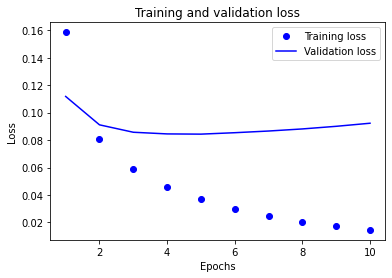

In [24]:
# Plotting Training and Validation Loss

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Optimal number of epochs=2 ,Training validation loss increases as epoch goes above 2 due to over-fitting.

**Plotting training and Validation Accuracy**

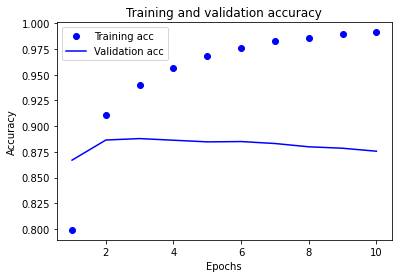

In [27]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

*From the above figure t's evident that the training accuracy approaches nearly 100%, specifically reaching 99.81% accuracy after 10 epochs.*


*If we observe the validation accuracy, At the beginning, there is an upward trend in accuracy, followed by a subsequent decrease, possibly stabilizing at a consistent 86% towards the end.*

In [28]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 681us/step - loss: 0.1012 - accuracy: 0.8634


In [29]:
results

[0.10117580741643906, 0.8633999824523926]

**Re-building the model with drop-out and the Regularise**

In [34]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras import regularizers


model = keras.Sequential()
model.add(Dense(32,activation='tanh', activity_regularizer=regularizers.L2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam", #changing optimizer to ADAM
              loss="mean_squared_error",
              metrics=["accuracy"])

          
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

          

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=0,
                    batch_size=256,
                    validation_data=(x_val, y_val))


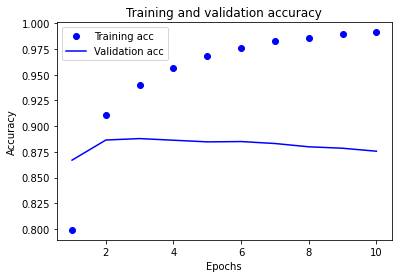

In [35]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

*When I applied the dropout layer, it had a limited impact on my results. The validation accuracy increased only slightly, by a fraction, reaching 86.69%.*

In [36]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 679us/step - loss: 0.2621 - accuracy: 0.4960


In [37]:
results

[0.26209133863449097, 0.4959999918937683]

*Considering a scenario where we employ a neural network architecture consisting of three hidden layers. For optimization, we opt for the Adam optimizer, while the activation function employed in these layers is tanh. To compute the loss, we utilize the mean squared error (MSE) as our chosen loss function.*

**Training the model with Hypertunned Parameters mentioned above**

In [38]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from keras.layers import Dropout


model = keras.Sequential()
model.add(Dense(32,activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='tanh',kernel_regularizer=regularizers.L1(0.01), activity_regularizer=regularizers.L2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32,activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam", #changing optimizer to ADAM
              loss="mean_squared_error",
              metrics=["accuracy"])

          
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

          

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/10
30/30 [==============================] - 2s 53ms/step - loss: 1.6263 - accuracy: 0.7444 - val_loss: 1.4020 - val_accuracy: 0.8696
Epoch 2/10
30/30 [==============================] - 1s 29ms/step - loss: 1.2694 - accuracy: 0.8901 - val_loss: 1.1165 - val_accuracy: 0.8855
Epoch 3/10
30/30 [==============================] - 1s 28ms/step - loss: 0.9935 - accuracy: 0.9228 - val_loss: 0.8808 - val_accuracy: 0.8869
Epoch 4/10
30/30 [==============================] - 1s 28ms/step - loss: 0.7609 - accuracy: 0.9361 - val_loss: 0.6741 - val_accuracy: 0.8855
Epoch 5/10
30/30 [==============================] - 1s 30ms/step - loss: 0.5602 - accuracy: 0.9481 - val_loss: 0.5012 - val_accuracy: 0.8846
Epoch 6/10
30/30 [==============================] - 1s 31ms/step - loss: 0.3976 - accuracy: 0.9560 - val_loss: 0.3634 - val_accuracy: 0.8823
Epoch 7/10
30/30 [==============================] - 1s 28ms/step - loss: 0.2693 - accuracy: 0.9635 - val_loss: 0.2567 - val_accuracy: 0.8841
Epoch 8/10
30

In [17]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

NameError: name 'history' is not defined

<Figure size 432x288 with 0 Axes>

**Summary**

For Implementing the neural networks, we need the layers

+ Input Layer : using keras we try to create a model that starts with input represented using "Keras.Sequential"
   model = keras.Sequential()
+ Hidden Layer: added layers  using the format "model.add(Dense(32,activation='tanh'))"
    model.add(Dense(32,activation='tanh'))
    model.add(Dense(32,activation='tanh'))
    model.add(Dense(32,activation='tanh'))
+ Output Layer : The output layer will typically consist of a single unit, which produces the output value. This is  often represented as:"model.add(Dense(1, activation='sigmoid'))"

*I would like briefly explain hidden Layer.*

we are introducing a dense layer with 32 hidden units, and it employs the "tanh activation function."
When we mention having 2 or 3 hidden layers, this description is applied 2 or 3 times consecutively.

Common activation functions include relu, tanh, and sigmoid.

Typically, the output layer consists of a single unit, often using the sigmoid activation function.

The statement "model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])" indicates that the network will be compiled using the Adam optimizer, employing mean squared error (MSE) as the loss function, and tracking accuracy as a metric.

**Conclusions:**

+ We've created neural networks with both single and three layers.

+ Tanh activation functions have been employed in lieu of ReLU.

+ The optimizer of choice is Adam, replacing RMSprop.

+ We've introduced dropout layers with dropout rates of 0.4 in the single-layer model and 0.5 in the three-layer model.

+ L1 and L2 regularizers have been incorporated into the models.

+ Achieved a training accuracy of 99% on the IMDB dataset.

*Comparison of two approaches:*

+ Single-layer approach: Validation accuracy reached 86.34%.
+ Three-layered approach: Achieved a higher validation accuracy of 86.41%.
+ Addressed overfitting concerns with the introduction of dropout layers, resulting in an accuracy increase to 88.48% in the three-layered approach.
+ The use of dropout layers and L1 & L2 regularizers contributed to this improvement.

| Approach             | Training Accuracy | Validation Accuracy | 
|----------------------|-------------------|---------------------|
| Single-layer         | 99.81%            | 86.34%              |
| Three-layered        | 99.81%            | 86.41%              |
| Dropout and Regularise | 97.44%          | 88.48%              | 

